# Dataframe Calculations

## Introduction

There are cases where we might want to augment our Pandas DataFrame with calculated columns. Pandas enables us to perform these calculations and easily store them in a new column.

## Working with Constants 



We can add new calculated columns using an existing column and a constant value.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read animals 
animals = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/animals.csv')
animals

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf
...,...,...,...
57,160.004,169.000,Brazilian_tapir
58,0.900,2.600,Tenrec
59,1.620,11.400,Phalanger
60,0.104,2.500,Tree_shrew


In [3]:
# Multiply animals['bodywt'] (in pounds) by 0.45359237 and store in brainwtkg column
animals['brainwtkg'] = animals['brainwt']  * 0.45359237

animals.head()

,brainwt,bodywt,animal,brainwtkg
0,3.385,44.500,Arctic_fox,1.535410
1,0.480,15.499,Owl_monkey,0.217724
2,1.350,8.100,Beaver,0.612350
3,464.983,423.012,Cow,210.912741
4,36.328,119.498,Gray_wolf,16.478104


Note that we used the head function to look at the first 5 rows for every column. We do this to confirm that the changes we made to the DataFrame worked as expected.

## Combining Two (Or More) Columns



We can perform calculations using a combination of two or more column. We write an equation that correctly refers to the columns in the DataFrame and assign the calculation to a new column.



For example, we can compute the ratio of body weight to brain weight for all animals in our data and assign this value to a new column.

In [4]:
# Compute the ratio of animals['bodywt'] /  and animals['brainwt'] and store this as animals['wtratio']

#df_new['newcolname']
animals['wtratio'] = animals['bodywt'] / animals['brainwt'] 
animals.head()


,brainwt,bodywt,animal,brainwtkg,wtratio
0,3.385,44.500,Arctic_fox,1.535410,13.146233
1,0.480,15.499,Owl_monkey,0.217724,32.289583
2,1.350,8.100,Beaver,0.612350,6.000000
3,464.983,423.012,Cow,210.912741,0.909736
4,36.328,119.498,Gray_wolf,16.478104,3.289419


## Conditional Calculations



It is possible to perform more complex calculations. For example, you may have noticed that we used division in the previous example without checking whether the denominator is zero. This can cause quite a bit of problems. 

Therefore, we can introduce a condition in our assignment. 

We can create conditional functions using the *where function* in numpy. We pass 3 arguments to the function. The *first* argument is the **condition**, the *second* is the value in case the condition is **true**, and the *third* is the value in case the condition is **false**.

In [7]:
# Make a new column with 'high' and 'low' values using np.where, where brainweight > 5

                                #Condition.             #If true
animals['Low/High'] = np.where(((animals['brainwtkg'] > 5) & (animals['brainwtkg'] < 10)), 'High', 'Low')
animals

,brainwt,bodywt,animal,brainwtkg,wtratio,Low/High
0,3.385,44.500,Arctic_fox,1.535410,13.146233,Low
1,0.480,15.499,Owl_monkey,0.217724,32.289583,Low
2,1.350,8.100,Beaver,0.612350,6.000000,Low
3,464.983,423.012,Cow,210.912741,0.909736,Low
4,36.328,119.498,Gray_wolf,16.478104,3.289419,Low
...,...,...,...,...,...,...
57,160.004,169.000,Brazilian_tapir,72.576594,1.056224,Low
58,0.900,2.600,Tenrec,0.408233,2.888889,Low
59,1.620,11.400,Phalanger,0.734820,7.037037,Low
60,0.104,2.500,Tree_shrew,0.047174,24.038462,Low


In [8]:
np.where(animals['brainwtkg'] > 5)

(array([ 3,  4,  5,  6, 18, 20, 21, 27, 28, 29, 31, 32, 35, 41, 43, 44, 45,
        48, 55, 57]),)

In [9]:
np.where((animals['brainwtkg'] > 5) & (animals['brainwtkg'] < 10))

(array([6]),)

In [10]:
animals[animals['Low/High'] == 'High']

,brainwt,bodywt,animal,brainwtkg,wtratio,Low/High
6,14.831,98.199,Roe_deer,6.727228,6.621199,High


## Calculations Using Functions 


As we have learned in a previous lesson, Pandas DataFrames have 3 components: 

- rows; 
- columns; 
- data. 

The rows and columns are also called axes. Axis zero is the row axis and axis one is the column axis. Therefore, we can apply functions to the column axis in order to summarize all columns at once.



Let's say we want to take a sum of all numeric columns in the animals DataFrame. We can do this by using the sum function and passing axis=1 as an argument to the function.

In [11]:
animals = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/animals.csv')

animals.head()

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf


In [47]:
# Sum weight values
animals['sum'] = animals[['brainwt', 'bodywt']].sum(axis=1)
animals.head()

,brainwt,bodywt,animal,sum
0,3.385,44.500,Arctic_fox,47.885
1,0.480,15.499,Owl_monkey,15.979
2,1.350,8.100,Beaver,9.450
3,464.983,423.012,Cow,887.995
4,36.328,119.498,Gray_wolf,155.826


In [48]:
# Simply add the two columns and create the column sum
animals['Total'] = animals['brainwt'] + animals['bodywt']
animals.head() 

,brainwt,bodywt,animal,sum,Total
0,3.385,44.500,Arctic_fox,47.885,47.885
1,0.480,15.499,Owl_monkey,15.979,15.979
2,1.350,8.100,Beaver,9.450,9.450
3,464.983,423.012,Cow,887.995,887.995
4,36.328,119.498,Gray_wolf,155.826,155.826


## Part II Other Useful Functionalities



Apart from the basic operations we can carry out, Pandas also offers us usefull functionalities to improve the efficiency and effectiveness of the calculations. 

In [13]:
# Read csv cars
cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [14]:
# Grouping the data: Make and Fuel Barrels/Year grouped by 'Make', obtaining the mean of Fuel Barrels/Year
cars[['Make', 'Fuel Barrels/Year']].groupby('Make').mean()

,Fuel Barrels/Year
Make,
AM General,22.674670
ASC Incorporated,20.600625
Acura,15.673371
Alfa Romeo,17.208234
American Motors Corporation,18.758092
...,...
Volkswagen,14.594784
Volvo,16.186996
Wallace Environmental,24.404196


In [51]:
 cars.groupby(['Make']).mean()[['Fuel Barrels/Year']]
#same as above but with different syntax

,Fuel Barrels/Year
Make,
AM General,22.674670
ASC Incorporated,20.600625
Acura,15.673371
Alfa Romeo,17.208234
American Motors Corporation,18.758092
...,...
Volkswagen,14.594784
Volvo,16.186996
Wallace Environmental,24.404196


In [52]:
 cars.groupby(['Make']).mean()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,
AM General,1984.500000,3.350000,5.000000,22.674670,15.000000,15.000000,14.750000,611.358244,2287.500000
ASC Incorporated,1987.000000,3.800000,6.000000,20.600625,14.000000,21.000000,16.000000,555.437500,2550.000000
Acura,2003.493377,2.834768,5.231788,15.673371,18.890728,25.940397,21.506623,422.585325,1852.483444
Alfa Romeo,1991.878049,2.556098,5.317073,17.208234,17.097561,23.902439,19.512195,463.952115,1962.195122
American Motors Corporation,1984.590909,3.813636,5.545455,18.758092,16.045455,20.181818,17.681818,505.758823,1893.181818
...,...,...,...,...,...,...,...,...,...
Volkswagen,2002.928367,2.236008,4.595033,14.594784,21.226361,28.985673,24.093601,392.741721,1579.417383
Volvo,2002.182706,2.504742,4.945607,16.186996,17.981869,25.064156,20.605300,435.803755,1812.273361
Wallace Environmental,1991.500000,4.315625,7.812500,24.404196,12.437500,16.000000,13.875000,657.990029,2996.875000


## Isin method



The isin-method is a very easy way to check whether some specific value is present and, subsequently, to make a subset out of that. 

In [53]:
cars_years = cars[cars['Year'].isin(['2004', '2017'])]
cars_years.head()  

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
38,Acura,3.5RL,2004,3.5,6.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Premium,18.311667,16,22,18,493.722222,2250
46,Acura,ILX,2017,2.4,4.0,Auto(AM-S8),Front-Wheel Drive,Compact Cars,Premium,11.365862,25,35,29,309.000000,1400
126,Acura,MDX 4WD,2004,3.5,6.0,Automatic 5-spd,4-Wheel or All-Wheel Drive,Sport Utility Vehicle - 4WD,Premium,19.388824,15,21,17,522.764706,2400
140,Acura,MDX AWD,2017,3.5,6.0,Automatic (S9),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Premium,14.982273,19,26,22,404.000000,1850
141,Acura,MDX AWD,2017,3.5,6.0,Automatic (S9),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Premium,15.695714,18,26,21,424.000000,1950


In [54]:
# Cars isin 2014
cars[cars['Make'].isin(['Audi', 'Lexus'])].head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
503,Audi,100,1989,2.3,5.0,Automatic 3-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,17,20,18,493.722222,1850
504,Audi,100,1989,2.3,5.0,Manual 5-spd,Front-Wheel Drive,Midsize Cars,Regular,17.347895,16,23,19,467.736842,1750
505,Audi,100,1990,2.3,5.0,Automatic 3-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,16,20,18,493.722222,1850
506,Audi,100,1990,2.3,5.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,16,22,18,493.722222,1850
507,Audi,100,1991,2.3,5.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,16,22,18,493.722222,1850


In [55]:
# Not; use tilde
cars[~cars['Make'].isin(['Acura'])].head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


# Sort Values



The sort values, as the name suggests, lets you sort values. 

In [15]:
# Sort by year using .sort_values by method
cars.sort_values(by = 'Year', ascending = True).head()
#sorting does not change the index, see below how to change also the index0

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
16337,GMC,T15 (S15) Pickup 4WD,1984,2.8,6.0,Manual 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,19.388824,15,21,17,522.764706,1950
16336,GMC,T15 (S15) Pickup 4WD,1984,2.8,6.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,18.311667,15,22,18,493.722222,1850
5636,Chevrolet,El Camino Pickup 2WD,1984,3.8,6.0,Automatic 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,19.388824,15,19,17,522.764706,1950
5637,Chevrolet,El Camino Pickup 2WD,1984,3.8,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,18.311667,15,22,18,493.722222,1850


Bonus; I want to reset indexings

In [16]:
cars.sort_values(by = 'Year', ascending = True).head().reset_index(drop=True)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,GMC,T15 (S15) Pickup 4WD,1984,2.8,6.0,Manual 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,19.388824,15,21,17,522.764706,1950
2,GMC,T15 (S15) Pickup 4WD,1984,2.8,6.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,18.311667,15,22,18,493.722222,1850
3,Chevrolet,El Camino Pickup 2WD,1984,3.8,6.0,Automatic 3-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,19.388824,15,19,17,522.764706,1950
4,Chevrolet,El Camino Pickup 2WD,1984,3.8,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,18.311667,15,22,18,493.722222,1850


## Count



Another useful method is the .count method which allows us to see how many 'pieces' there are of a certain entity in our dataframe.  

In [17]:
cars[['Model', 'Year']].groupby('Year').count().head()

,Model
Year,
1984,645
1985,1581
1986,1188
1987,1198
1988,1119


In [65]:
# Use value counts to determine the total amount of cars['Make'] 
serie1 =cars['Make'].value_counts()
serie11
#this way of counting values works just for series not for data frame which would be serie1 =cars[['Make']].value_counts() (see double square parenthesis)

Chevrolet                 3643
Ford                      2946
Dodge                     2360
GMC                       2347
Toyota                    1836
                          ... 
Lambda Control Systems       1
Fisker                       1
Shelby                       1
General Motors               1
Aurora Cars Ltd              1
Name: Make, Length: 127, dtype: int64

In [60]:
 pd.DataFrame(cars['Make'].value_counts())

,Make
Chevrolet,3643
Ford,2946
Dodge,2360
GMC,2347
Toyota,1836
...,...
Lambda Control Systems,1
Fisker,1
Shelby,1
General Motors,1


# Info() and isnull()



The info method allows us to get useful information about the data base. For instance, how many columns and rows there are as well as their types. 

In [18]:
# Info 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Another very useful tool is the .isnull() method which locates the missing values (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike). 

In [19]:
# Read housing df
housing = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/housing_prices.csv')
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [63]:
# Check for null values using isnull() and value_counts() for Alley
housing['Alley'].isnull().value_counts()

True     1369
False      91
Name: Alley, dtype: int64

In [64]:
# Check for null values using isnull() and value_counts() for Alley
housing['Alley'].isna().value_counts()

True     1369
False      91
Name: Alley, dtype: int64

## Datetime



Sometimes we want to convert the numerical types to datetime objects. 

In [20]:
# Display the column types
cars = pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [29]:
cars.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [21]:
# convert year to datetime object using pd.to_datetime
cars['Year'] = pd.to_datetime(cars['Year'])
cars.dtypes

Make                               object
Model                              object
Year                       datetime64[ns]
Engine Displacement               float64
Cylinders                         float64
Transmission                       object
Drivetrain                         object
Vehicle Class                      object
Fuel Type                          object
Fuel Barrels/Year                 float64
City MPG                            int64
Highway MPG                         int64
Combined MPG                        int64
CO2 Emission Grams/Mile           float64
Fuel Cost/Year                      int64
dtype: object

## Correlation



We can also compute the correlation coefficient. 

In [31]:
# Compute the correlation on the animals set using Pearson's method. 
animals_corr = animals.corr() # OR animals_corr = animals.corr(method='pearson')

animals_corr

,brainwt,bodywt,sum,Total
brainwt,1.000000,0.934154,0.982827,0.982827
bodywt,0.934154,1.000000,0.983965,0.983965
sum,0.982827,0.983965,1.000000,1.000000
Total,0.982827,0.983965,1.000000,1.000000


In [32]:
car_corr = cars.corr()
car_corr

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Engine Displacement,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


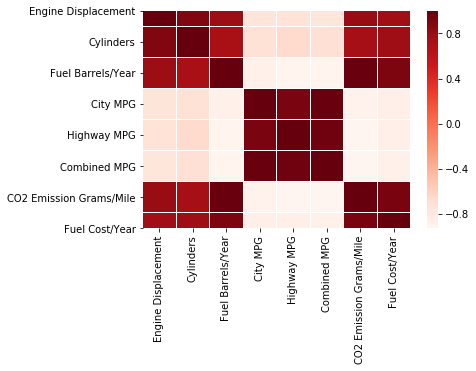

In [67]:
import seaborn as sns
sns.heatmap(car_corr,cmap='Reds',linecolor='white',linewidths=0.1)


# Unique method



Lastly, we can obtain all unique values in a dataframe column. 

In [66]:
# Select all unique car manufacturers
cars['Make'].unique() 

array(['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo',
       'American Motors Corporation', 'Aston Martin', 'Audi',
       'Aurora Cars Ltd', 'Autokraft Limited', 'BMW', 'BMW Alpina',
       'Bentley', 'Bertone', 'Bill Dovell Motor Car Company',
       'Bitter Gmbh and Co. Kg', 'Bugatti', 'Buick', 'CCC Engineering',
       'CX Automotive', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Consulier Industries Inc', 'Dabryan Coach Builders Inc', 'Dacia',
       'Daewoo', 'Daihatsu', 'Dodge', 'E. P. Dutton, Inc.', 'Eagle',
       'Environmental Rsch and Devp Corp', 'Evans Automobiles',
       'Excalibur Autos', 'Federal Coach', 'Ferrari', 'Fiat', 'Fisker',
       'Ford', 'GMC', 'General Motors', 'Genesis', 'Geo', 'Goldacre',
       'Grumman Allied Industries', 'Grumman Olson', 'Honda', 'Hummer',
       'Hyundai', 'Import Foreign Auto Sales Inc',
       'Import Trade Services', 'Infiniti', 'Isis Imports Ltd', 'Isuzu',
       'J.K. Motors', 'JBA Motorcars, Inc.', 'Jaguar', 'Jeep', 'Ki

In [34]:
cars['Make'].nunique() 

127

## Summary 


In this lesson we learned different ways to create calculated columns. We computed a new column by combining existing data with a constant. We also computed a calculated column using two existing columns as well as using a conditional function to create a calculated column. Finally, we looked at some additional functionalities such as correlation matrices and methods to detect missing values. 

In [22]:
Kahooooot  6775231

SyntaxError: invalid syntax (<ipython-input-22-f3d575a73f53>, line 1)